# Patient Consultation Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands weather the patient need to consult the doctor or not based on his test results.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/ashishsahani/hospital-admissions-data/data
- The data consists of 56 column and 15757 rows.

### 1.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/Users/manjunathreddy/Desktop/mlproject3/notebook/data/health_data33-2.csv')

In [5]:
data.head()

,Unnamed: 0,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,assistance_needed
0,0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,...,0,0,0,0,0,0,0,0,0,Yes
1,1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,...,0,0,0,0,0,0,0,0,0,No
2,2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,...,0,0,0,0,0,0,0,0,0,Yes
3,3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,...,0,0,0,0,0,0,0,0,0,No
4,4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,...,0,0,0,0,0,0,0,0,0,No


In [6]:
data.columns

Index(['Unnamed: 0', 'SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER',
       'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year',
       'DURATION OF STAY', 'duration of intensive unit stay', 'OUTCOME',
       'SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB',
       'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP',
       'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA',
       'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
       'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
       'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
       'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM',
       'CHEST INFECTION', 'assistance_needed'],
      dtype='object')

### 1.2 Selection of the Data Attributes

- There are lot of attributes we don't need all attributes, we select only the attributes which are helpful for our project.
- We are selecting only the 'AGE', 'GENDER', 'RURAL','TYPE OF ADMISSION-EMERGENCY/OPD','TLC','PLATELETS','HB','GLUCOSE','ATYPICAL CHEST PAIN' are useful to say wheather patient has to consult the doctor or not.

In [7]:
df = data[['AGE', 
           'GENDER', 
           'RURAL',
           'TYPE OF ADMISSION-EMERGENCY/OPD',
           'TLC','PLATELETS','HB','GLUCOSE','ATYPICAL CHEST PAIN','assistance_needed']]

- Attribute names are not looking good so, I feel it is better to change the names for our Understanding

In [8]:
new_column_names = {
                    'AGE': 'age',
                    'GENDER': 'gender',
                    'RURAL' : 'locality',
                    'TYPE OF ADMISSION-EMERGENCY/OPD' : 'type_of_admission',
                    'TLC' : 'tl_count',
                    'PLATELETS':'platelet_count',
                    'HB' : 'hb_count',
                    'GLUCOSE' : 'glucose',
                    'ATYPICAL CHEST PAIN' : 'alypical_chest_pain'}

df.rename(columns=new_column_names, inplace=True)

In [9]:
df.head()

,age,gender,locality,type_of_admission,tl_count,platelet_count,hb_count,glucose,alypical_chest_pain,assistance_needed
0,81,M,R,E,16.1,337.0,9.5,80.0,0,Yes
1,65,M,R,E,9.0,149.0,13.7,112.0,0,No
2,53,M,U,E,14.7,329.0,10.6,187.0,0,Yes
3,67,F,U,E,9.9,286.0,12.8,130.0,0,No
4,60,F,U,E,9.1,26.0,13.6,144.0,0,No


- So now our dataset seems clear about attributes


In [10]:
df.columns

Index(['age', 'gender', 'locality', 'type_of_admission', 'tl_count',
       'platelet_count', 'hb_count', 'glucose', 'alypical_chest_pain',
       'assistance_needed'],
      dtype='object')

In [11]:
df.shape

(15757, 10)

- age : age of the patients -> (integer)
- gender : patients gender ->(Male(M)/FEmale(F))
- locality : patients home place (Rural(R)/Urban(U)) 
- type_of_admission : patients type of addmission (Emergency(E)/Outpatient(O))
- tl_count : Total Lymphocyte count
- platelet_count : Total Platelets count
- hb_count : Hemoglobin Level
- glucose : Glucose count
- alypical_chest_pain : Patient had any pain on chest -> (Yes(1)/No(0))
- assistance_needed : weather patient needed assistance or not ->(Yes/No)

### 2. Data Checks to perform

- Check Duplicates
- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 2.1 Check Duplicates

In [12]:
df.duplicated().sum()

1365

- Our dataset contains the 1386 duplicates , so we drop all the duplicated rows

In [14]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

1365

- Now our dataset looks clear with duplicated rows

### 2.2 Check Missing values

In [15]:
df.isna().sum()

age                      0
gender                   0
locality                 0
type_of_admission        0
tl_count               241
platelet_count         246
hb_count               209
glucose                871
alypical_chest_pain      0
assistance_needed        0
dtype: int64

#### There are some missing values in the tl_count,hb_count,glucose
- We can impute the missing values with the mean or other values but it is health care data which is sensitive, So I feel it is better to delete the missing values rows

In [16]:
df = df.dropna()

In [17]:
df.isna().sum()

age                    0
gender                 0
locality               0
type_of_admission      0
tl_count               0
platelet_count         0
hb_count               0
glucose                0
alypical_chest_pain    0
assistance_needed      0
dtype: int64

- Now our dataset looks clear with null values

### 2.3 Check data type

In [18]:
df.dtypes

age                      int64
gender                  object
locality                object
type_of_admission       object
tl_count               float64
platelet_count         float64
hb_count               float64
glucose                float64
alypical_chest_pain      int64
assistance_needed       object
dtype: object

- Here patient_id,tl_count,hb_count,glucose are integer data type and date_of_admission is datetime datatype,alypical_chest_pain is of boolean type so we change them into there datatypes


In [19]:
df['hb_count'] = pd.to_numeric(df['hb_count'],errors='coerce')
df['tl_count'] = pd.to_numeric(df['tl_count'],errors='coerce')
df['glucose'] = pd.to_numeric(df['glucose'],errors='coerce')
df['platelet_count'] = pd.to_numeric(df['platelet_count'],errors='coerce')

In [20]:
df['alypical_chest_pain'] = df['alypical_chest_pain'].astype(bool)

In [21]:
df.dtypes

age                      int64
gender                  object
locality                object
type_of_admission       object
tl_count               float64
platelet_count         float64
hb_count               float64
glucose                float64
alypical_chest_pain       bool
assistance_needed       object
dtype: object

- Now our dataset is clear with Data types

### Check For Any null values added after changing datatypes

In [22]:
df.isna().sum()

age                    0
gender                 0
locality               0
type_of_admission      0
tl_count               0
platelet_count         0
hb_count               0
glucose                0
alypical_chest_pain    0
assistance_needed      0
dtype: int64

- We will delete all the null values again

In [23]:
df = df.dropna()

In [24]:
df.isna().sum()

age                    0
gender                 0
locality               0
type_of_admission      0
tl_count               0
platelet_count         0
hb_count               0
glucose                0
alypical_chest_pain    0
assistance_needed      0
dtype: int64

- Now clear with all datatypes and null values

### 2.4 Check the number of unique values of each column

In [25]:
df.nunique()

age                     96
gender                   2
locality                 2
type_of_admission        2
tl_count               435
platelet_count         642
hb_count               177
glucose                519
alypical_chest_pain      2
assistance_needed        2
dtype: int64

In [26]:
normal_ranges = {
    'hb_count': (12, 18),  
    'tl_count': (10, 40),  
    'platelet_count': (150, 450),  
    'glucose': (70, 125),  
}


In [27]:
def assistance_needed(row):
    for col, (lower, upper) in normal_ranges.items():
        if row[col] < lower or row[col] > upper:
            return 'Yes'
        return 'No'  


In [28]:
df['assistance_needed'] = df.apply(assistance_needed, axis=1)


### 2.5 Check various categories present in the different categorical column

In [29]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'locality' variable:  ",end=" ")
print(df['locality'].unique())

print("Categories in'type_of_admission' variable:",end=" " )
print(df['type_of_admission'].unique())

print("Categories in 'alypical_chest_pain' variable:     ",end=" " )
print(df['alypical_chest_pain'].unique())

Categories in 'gender' variable:      ['M' 'F']
Categories in 'locality' variable:   ['R' 'U']
Categories in'type_of_admission' variable: ['E' 'O']
Categories in 'alypical_chest_pain' variable:      [False  True]


In [30]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'tl_count', 'platelet_count', 'hb_count', 'glucose', 'alypical_chest_pain']

We have 4 categorical features : ['gender', 'locality', 'type_of_admission', 'assistance_needed']


### 2.6 Check statistics of data set

In [31]:
df.describe()

,age,tl_count,platelet_count,hb_count,glucose
count,13364.000000,13364.000000,13364.000000,13364.000000,13364.000000
mean,61.335004,11.453980,239.311380,12.259318,162.764008
std,13.374216,7.513416,102.672577,2.311011,84.154595
min,4.000000,0.100000,1.380000,3.000000,1.200000
25%,54.000000,7.900000,173.000000,10.700000,106.000000
50%,62.000000,10.000000,226.000000,12.400000,136.000000
75%,70.000000,13.300000,289.000000,13.900000,195.000000
max,110.000000,314.000000,1111.000000,26.500000,888.000000


### Insights
- For age, tl_count,platelet_count,hb_count have the mean and 50th percentile are almost equal , but for glucose they are different.


## 3. Exploring Data ( Visualization )
### 3.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

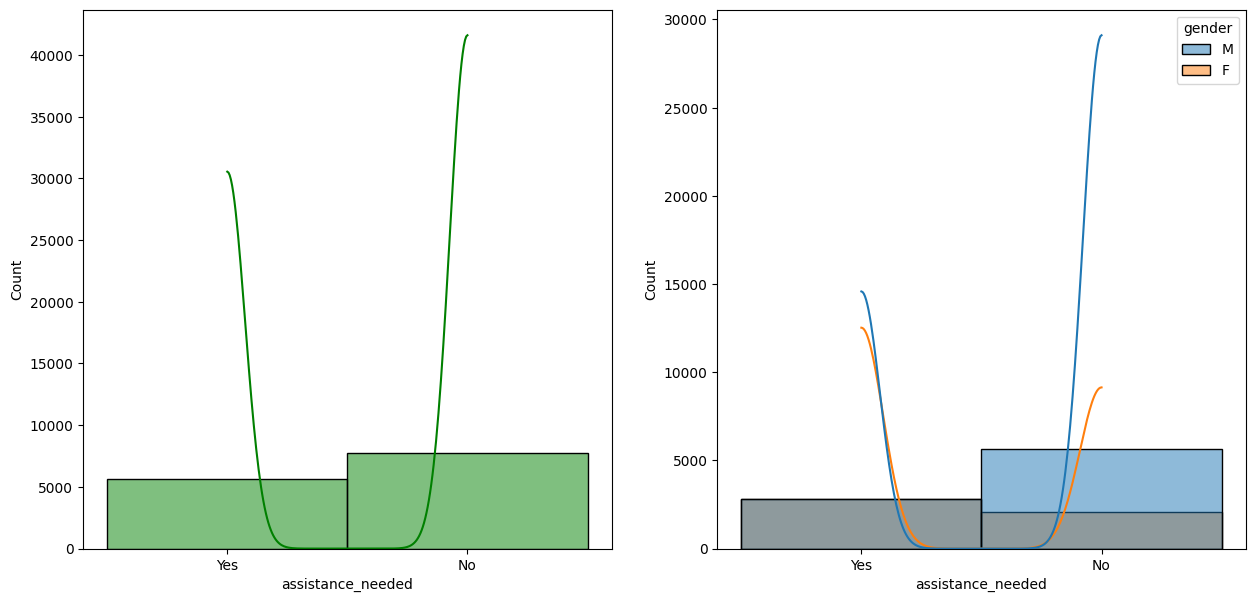

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='assistance_needed',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='assistance_needed',kde=True,hue='gender')
plt.show()

### 3.2 Pair Plot of Each and Every Model

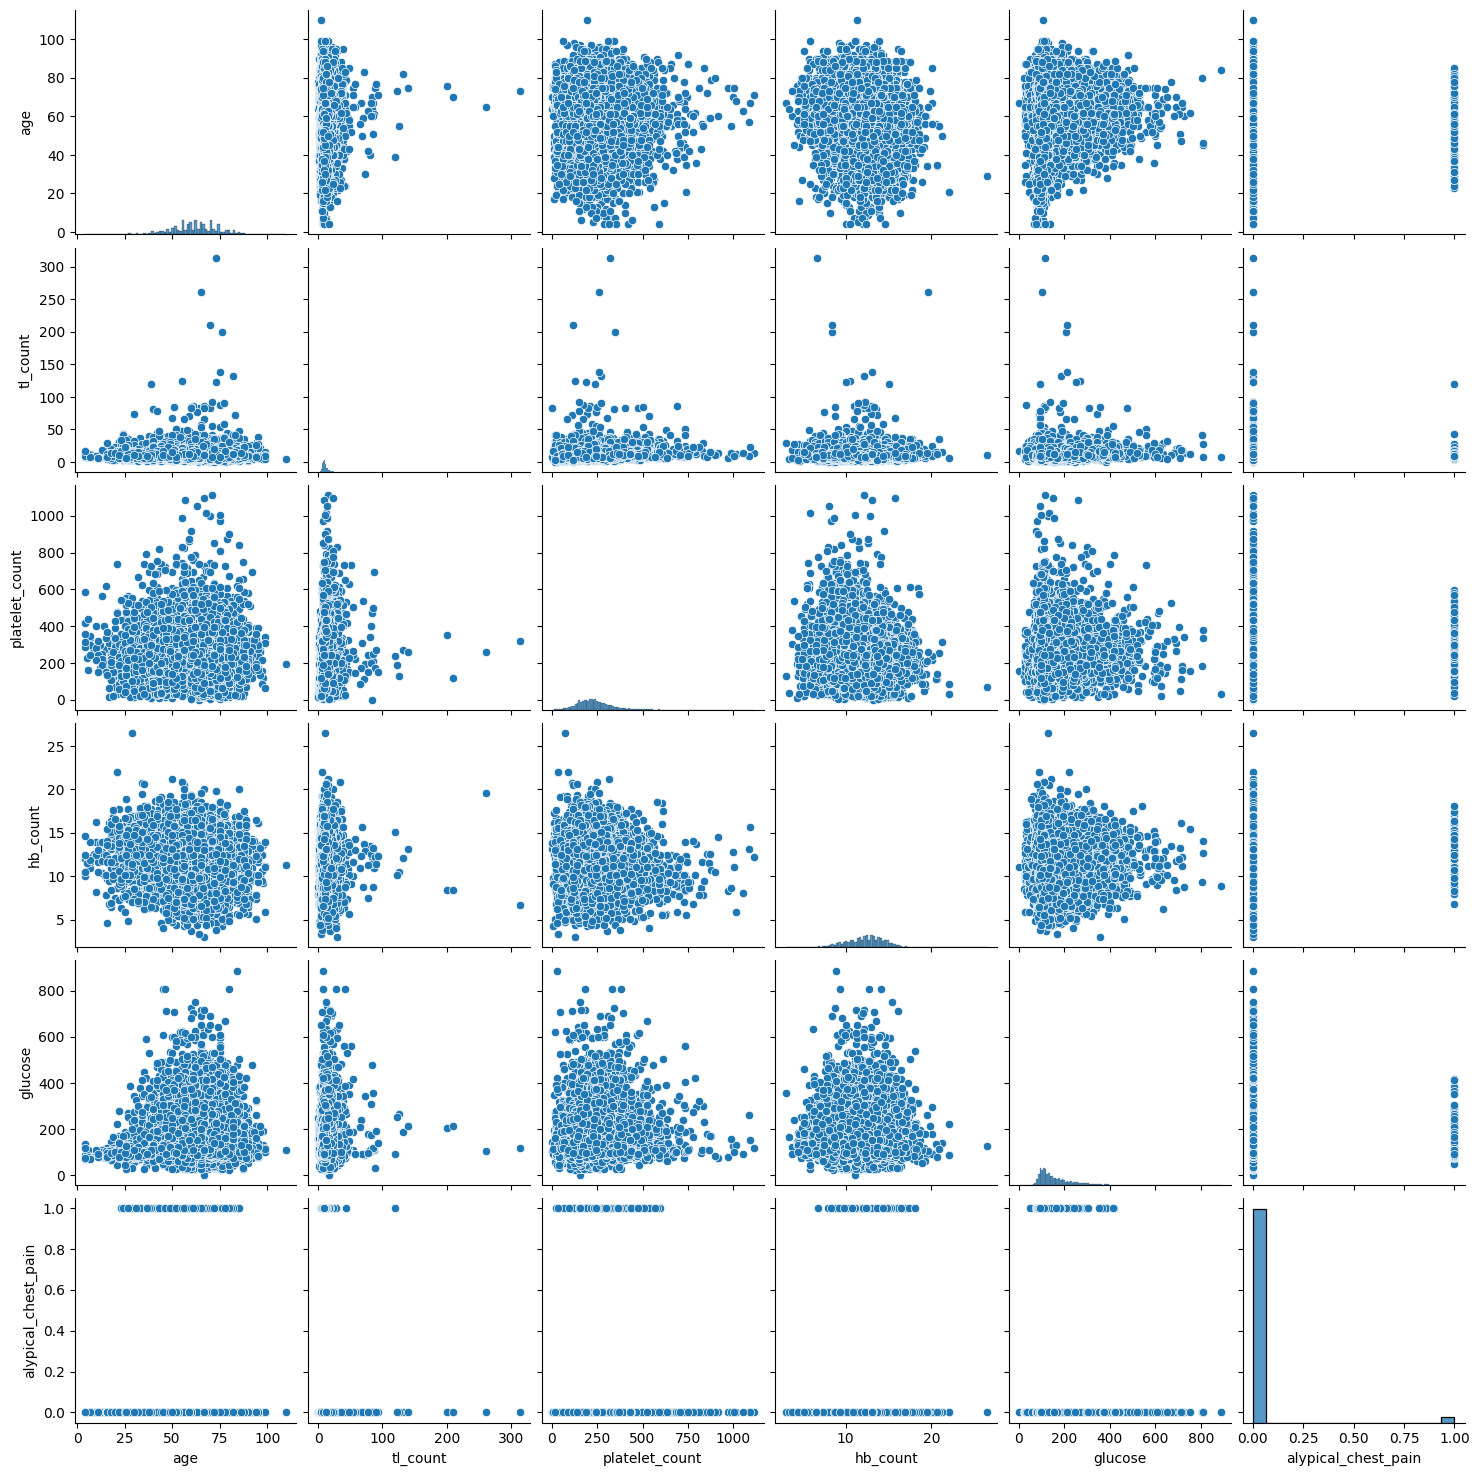

In [33]:
sns.pairplot(df)

#### Insights 
- From above we can say that no numeric attribute is co related to eachother

In [34]:
df.head()

,age,gender,locality,type_of_admission,tl_count,platelet_count,hb_count,glucose,alypical_chest_pain,assistance_needed
0,81,M,R,E,16.1,337.0,9.5,80.0,False,Yes
1,65,M,R,E,9.0,149.0,13.7,112.0,False,No
2,53,M,U,E,14.7,329.0,10.6,187.0,False,Yes
3,67,F,U,E,9.9,286.0,12.8,130.0,False,No
4,60,F,U,E,9.1,26.0,13.6,144.0,False,No


### 3.3 Box Plot

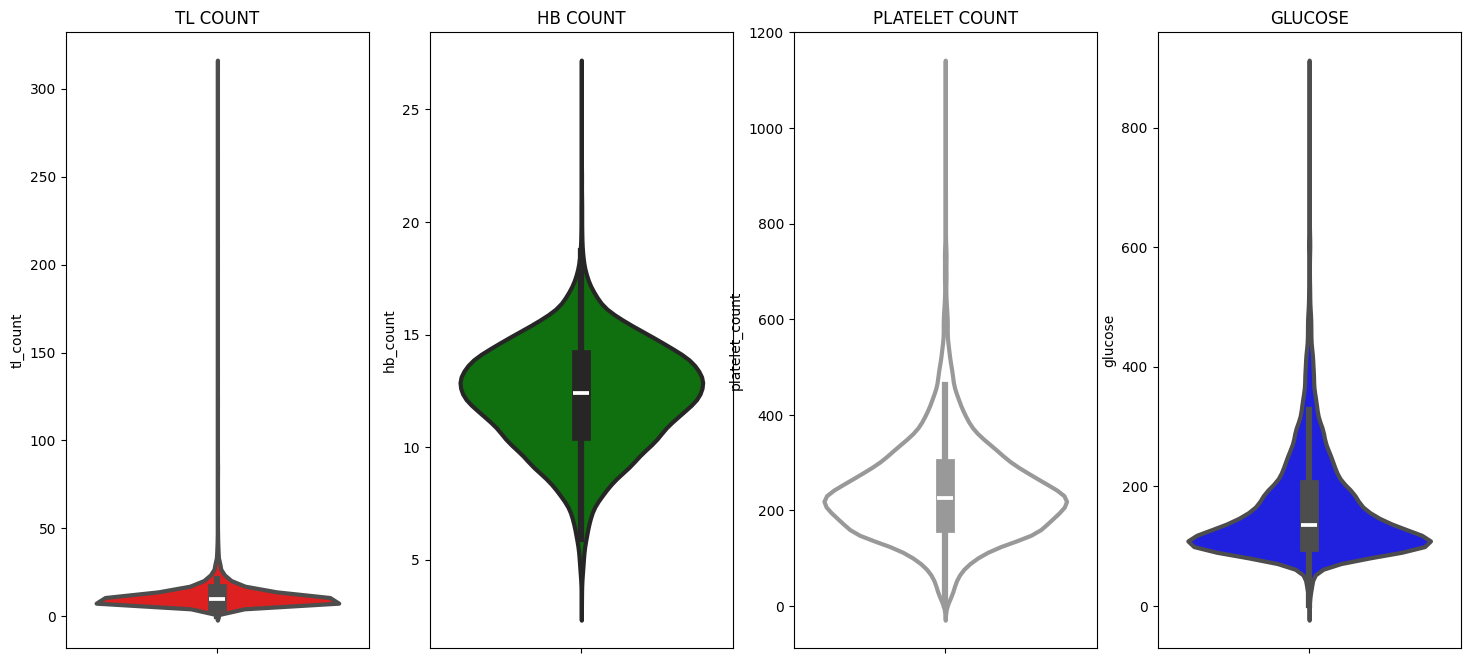

In [35]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('TL COUNT')
sns.violinplot(y='tl_count',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('HB COUNT')
sns.violinplot(y='hb_count',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('PLATELET COUNT')
sns.violinplot(y='platelet_count',data=df,color='white',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('GLUCOSE')
sns.violinplot(y='glucose',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above we can say that maximum tl_count lies between 0 to 25 ,platelet_count lies between 175 to 340 , hb_count lies between 11 to 14 and glucose lies between 100 to 200

### 3.4 Outlier Ditection

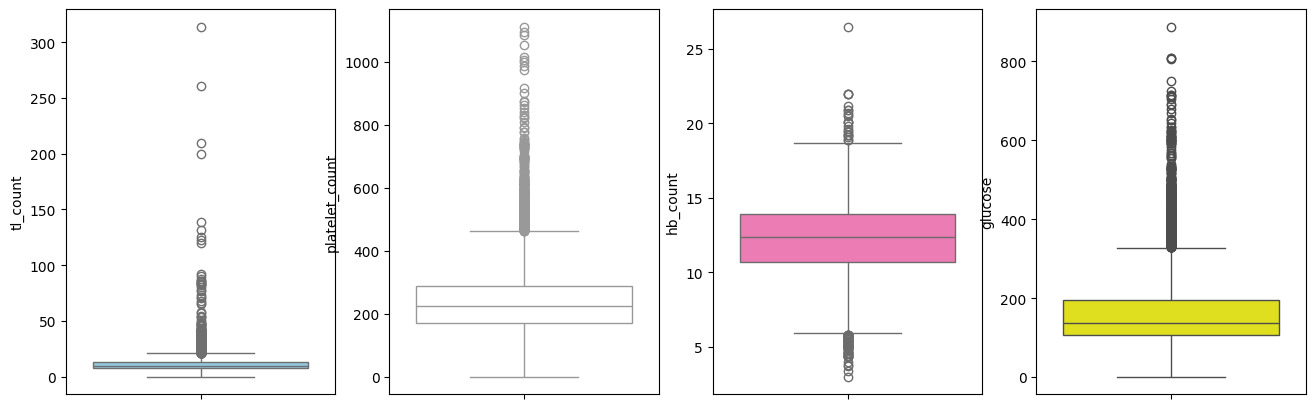

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['tl_count'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['platelet_count'],color='white')
plt.subplot(143)
sns.boxplot(df['hb_count'],color='hotpink')
plt.subplot(144)
sns.boxplot(df['glucose'],color='yellow')

plt.show()

- There are outliers in the dataset we delete them

In [37]:
numeric_columns = df.select_dtypes(include=['number'])

In [38]:
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
threshold_multiplier = 1.5

In [39]:
IQR = Q3-Q1

In [40]:
lower_bound = Q1 - threshold_multiplier * IQR
upper_bound = Q3 + threshold_multiplier * IQR

In [41]:
outliers = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)

In [42]:
cleaned_df = df[~outliers]

In [43]:
cleaned_df.head()

,age,gender,locality,type_of_admission,tl_count,platelet_count,hb_count,glucose,alypical_chest_pain,assistance_needed
0,81,M,R,E,16.1,337.0,9.5,80.0,False,Yes
1,65,M,R,E,9.0,149.0,13.7,112.0,False,No
2,53,M,U,E,14.7,329.0,10.6,187.0,False,Yes
3,67,F,U,E,9.9,286.0,12.8,130.0,False,No
4,60,F,U,E,9.1,26.0,13.6,144.0,False,No


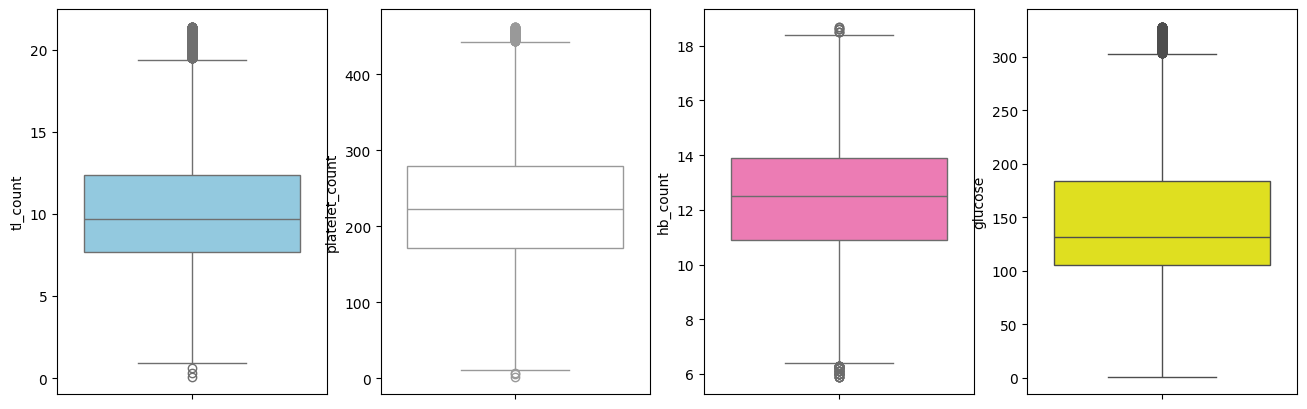

In [44]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(cleaned_df['tl_count'],color='skyblue')
plt.subplot(142)
sns.boxplot(cleaned_df['platelet_count'],color='white')
plt.subplot(143)
sns.boxplot(cleaned_df['hb_count'],color='hotpink')
plt.subplot(144)
sns.boxplot(cleaned_df['glucose'],color='yellow')

plt.show()

#### Insights 
- Now our dataset looks clear with the outliers

In [45]:
cleaned_df.size

114770

In [46]:
cleaned_df.to_csv('cleaned_df.csv')

### 3.5 Correlation Calculation

In [47]:
numeric_columns = cleaned_df.select_dtypes(include=['number'])

In [49]:
corr_matrix = numeric_columns.corr()

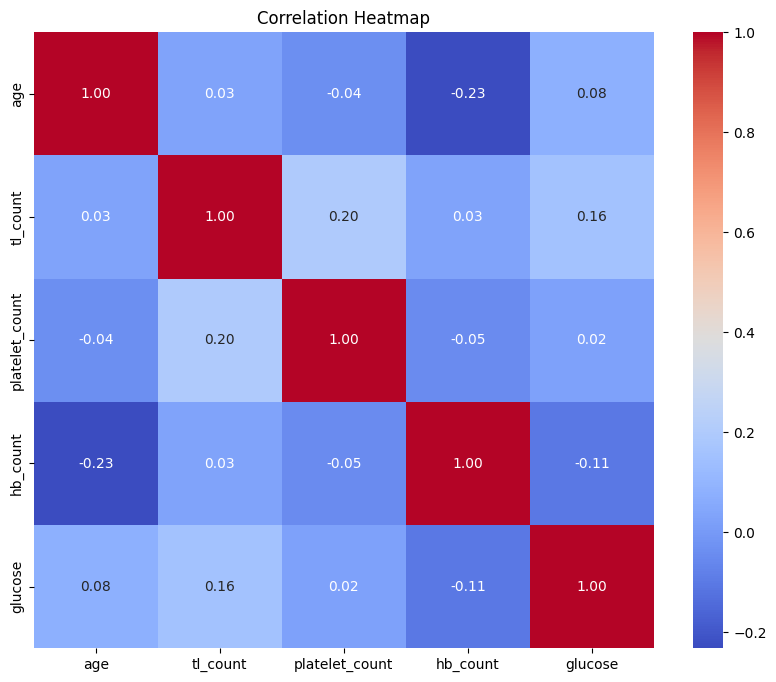

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Insights
- We found that the attributes are not related to each other, so we include all numeric attributes